In [460]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

#### <center> Для функции f на диапазоне [0, 10] с частотой дискретизации 100 изготовьте код для построения графика f. Используйте matplotlib.</center>


In [461]:
def plot_f(f, name = '', leftb = 0, rightb = 10, discr = 100):
    try:
        f(0)
    except ZeroDivisionError:
        leftb = 0.001
    fig = plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.title(name, fontsize=16)
    f = np.vectorize(f)
    x = np.linspace(leftb, rightb, discr)
    plt.plot(x, f(x), '.b-')

def plot_x_y(x, y, name = ''):
    fig = plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.title(name, fontsize=16)
    plt.plot(x, y, '.b-')


#### <center> Реализуйте прямое и обратное дискретное преобразование Фурье FFT и FFTReverse на питоне за O(n log n) </center>

In [462]:
def make_np_arr(polynom):
    res = np.array([])
    for i in polynom:
        res = np.append(res, i)
    return res

def make_pow_2(polynom):
    k = 1
    n = len(polynom)
    while(k < n):
        k *= 2
    while (len(polynom) < k):
        polynom = np.append(polynom, 0)
    return polynom

In [463]:
def FFT(polynom):
    """reqyired len(polygon) == 2**k and >= 1"""
    
    N = len(polynom)
    if (N == 1):
        return polynom
    elif (N == 2):
        even_fft = polynom[0]
        odd_fft = polynom[1]
    else:
        even_fft = FFT(polynom[0:N:2])
        odd_fft = FFT(polynom[1:N:2])
    
    k = int(N/2)
    res = np.array([0]*N, dtype=complex)
    
    w_exp = lambda x : np.exp(2j * math.pi * x/ N)
    for i in range(N):
        if (N == 2):
            res[i] = even_fft + w_exp(i) * odd_fft
        else:
            res[i] = even_fft[i % k] + w_exp(i) * odd_fft[i % k]
        
    return res
            

In [464]:
def FFT_for_all(p):
    polynom = make_np_arr(p)
    polynom = make_pow_2(p)
    return FFT(polynom)

In [465]:
def FFTReverse(fft):
    N = len(fft)
    return np.real(FFT(np.conj(fft)))/N   

#### <center>Подготовьте дискретизацию f на отрезке [0, T] - набор значений fi=f(xi) в точках xi, равномерно расположенных на отрезке [0, T]</center>

In [466]:
def discretization(f, rightb = 10, size = 100):
    leftb = 0;
    try:
        f(0)
    except:
        leftb = 0.001
    x = np.linspace(leftb, rightb, size)
    f = np.vectorize(f)
    y = f(x)
    return y

In [467]:
test_functions = [lambda x: x, lambda x: x**2, math.sin, lambda x: math.sin(x**2), lambda x: math.sin(x)/x]
func_w_names = list(zip(test_functions, ["$x$", "$x^2$", "$sin(x)$","$sin(x^2)$",r"$\frac{sin(x)}{x}$"]))

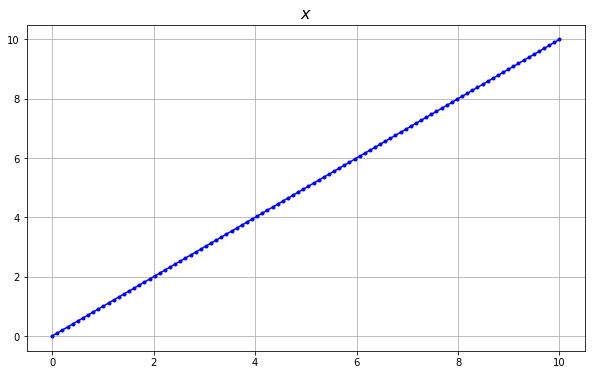

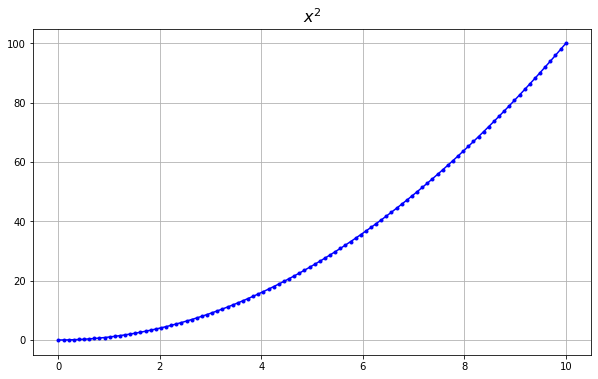

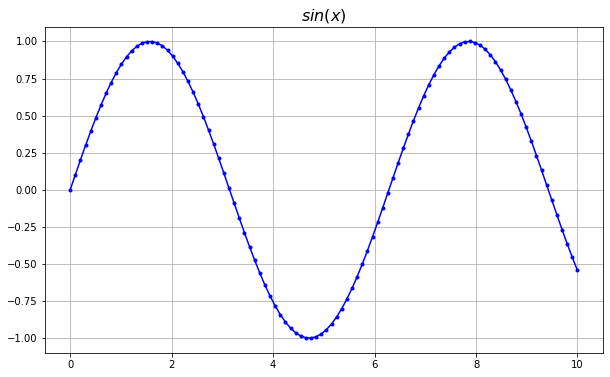

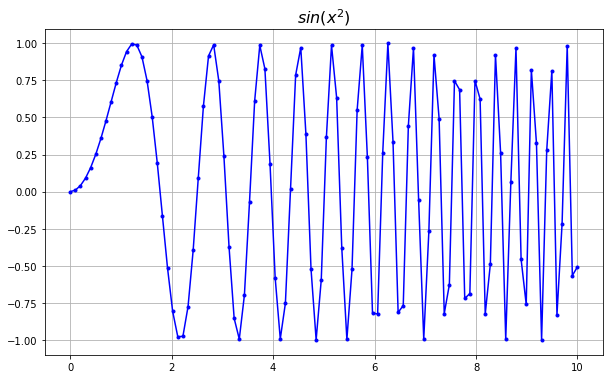

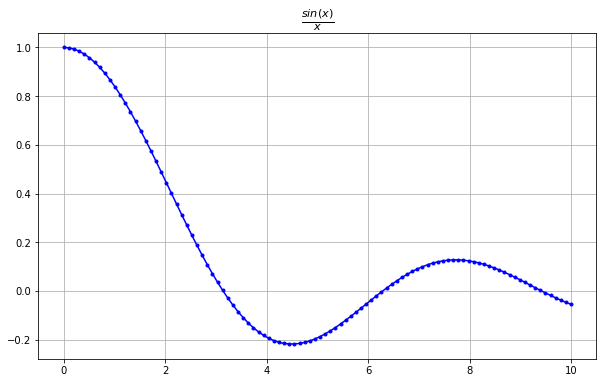

In [468]:
for i in func_w_names:
    plot_f(i[0], i[1])

#### <center>По функции f=(f0,..,fm-1) вычислите g = FFT( f ). Вычислите f2 = FFTReverse( g ). Постройте график f2.</center>


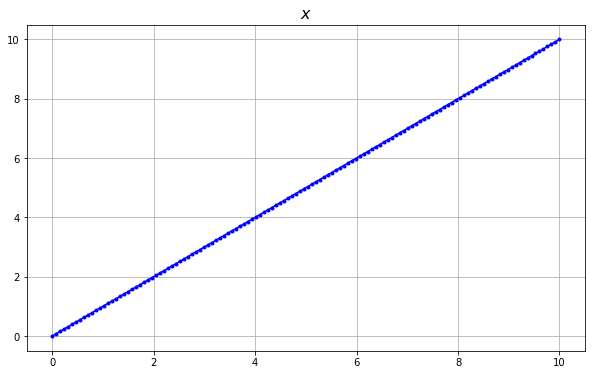

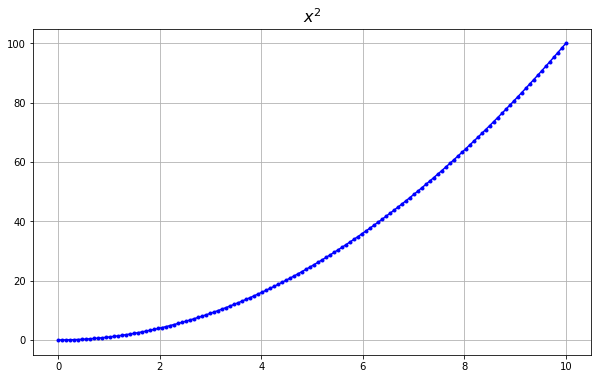

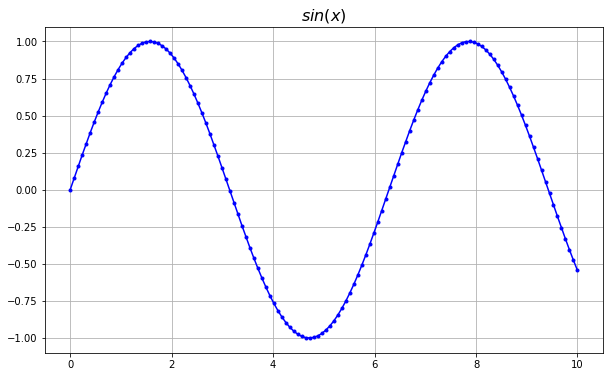

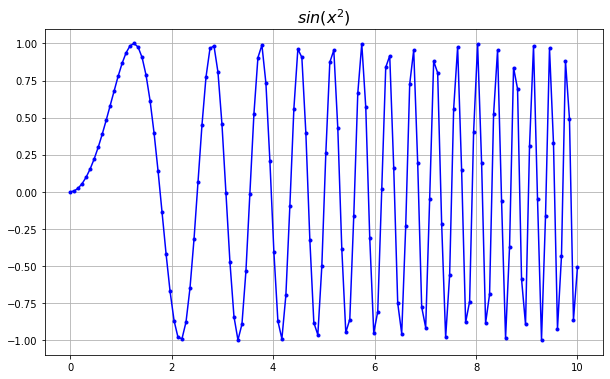

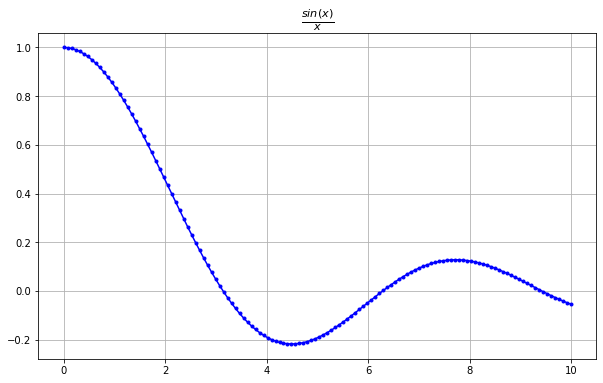

In [469]:
def plot_full(f):
    rightb = 10
    size = 128
    y = discretization(f[0], size=size)
    g = FFT_for_all(y)
    y2 = FFTReverse(g)
    size = len(y2)
    x = np.linspace(0, rightb, size)
    plot_x_y(x, y2, f[1])
    
for f in func_w_names:
    plot_full(f)

#### <center>Обнулите некоторую долю D последних коэффициентов g. Обновите f2 и ее график. Попробуйте несколько различных значений D.</center>

In [470]:
def plot_with_zeroize(f, D):
    rightb = 10
    size = 128
    y = discretization(f[0], size=size)
    g = FFT_for_all(y)
    #print(g)
    for i in range(int((1-D)*len(g)), len(g)):
        g[i] = 0
    #print(g)
    y2 = FFTReverse(g)
    size = len(y2)
    x = np.linspace(0, rightb, size)
    plot_x_y(x, y2, f[1])

#### <center>Проведите эксперименты с функциями f = x, x2, sin x, sin x2, sin x / x. Для каждой функции найдите долю D, для которой разница f и f2 видна невооруженным глазом.</center>

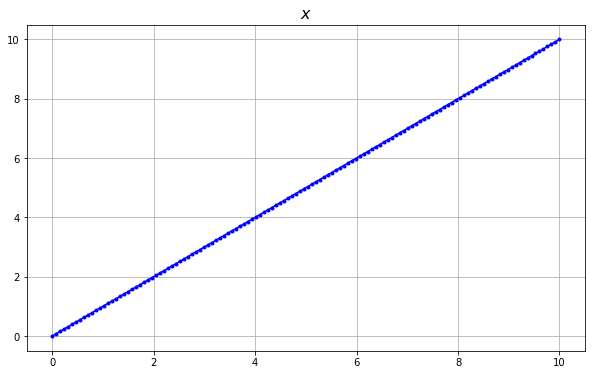

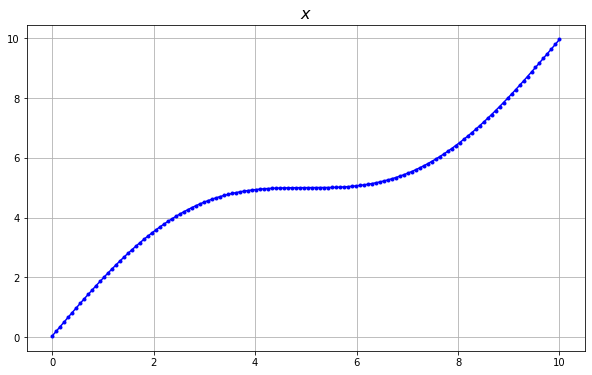

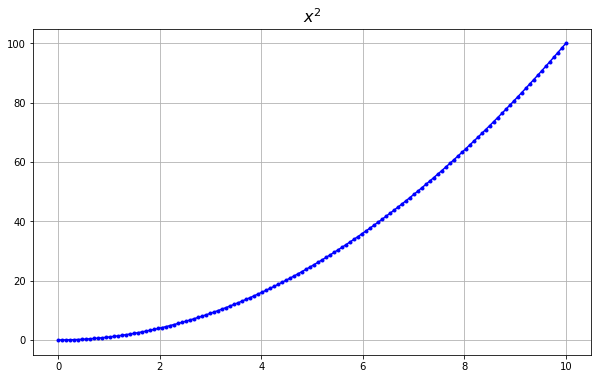

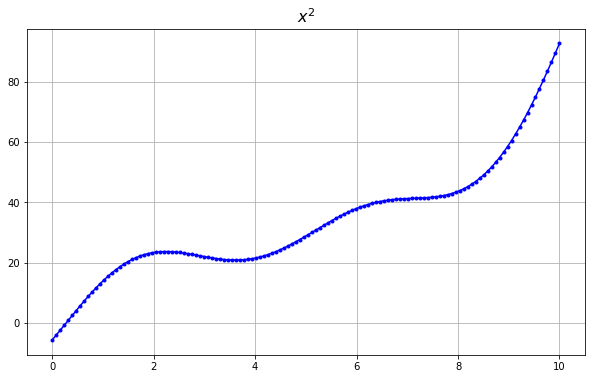

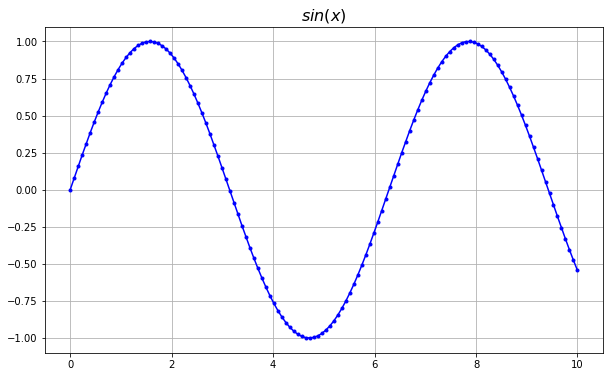

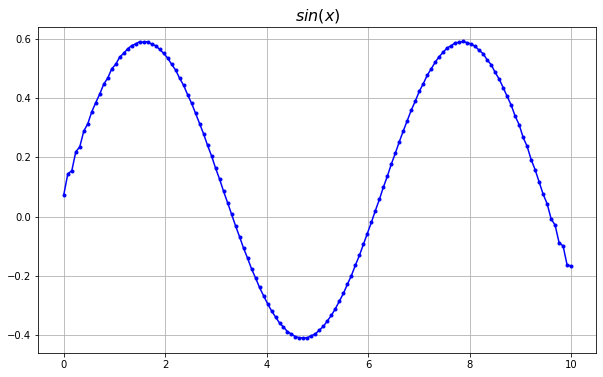

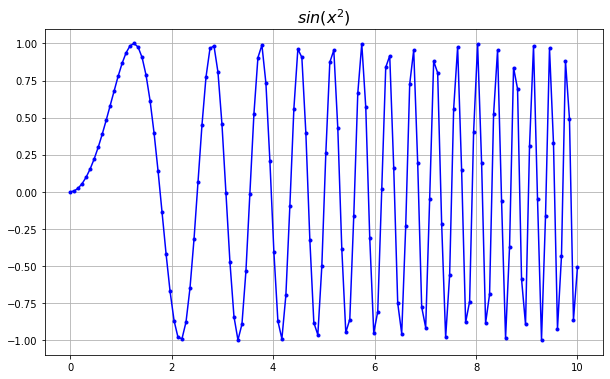

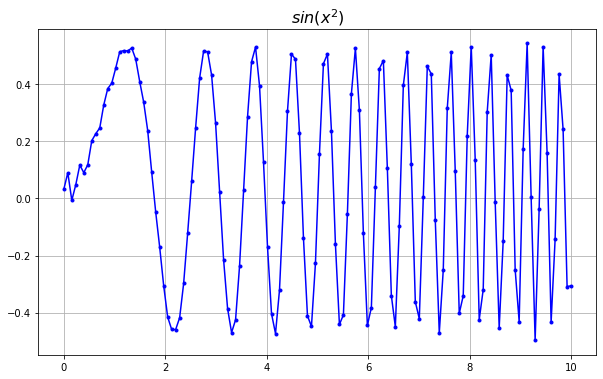

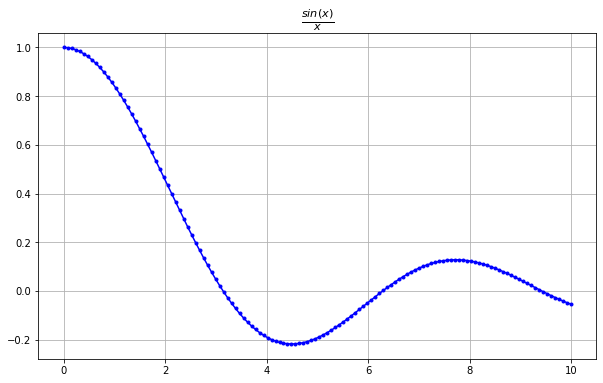

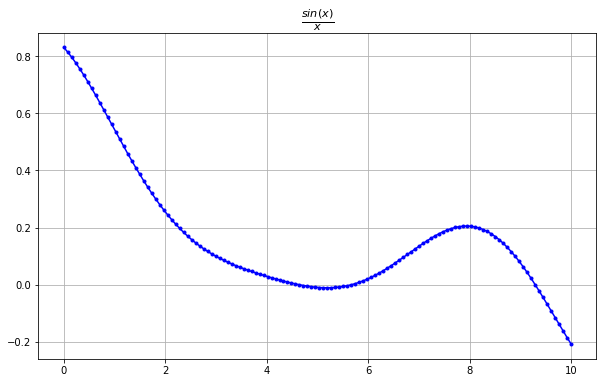

In [481]:
D = [0.001, 0.01 ,0.55, 0.7, 0.01]
for i in range(5):
    plot_full(func_w_names[i])
    plot_with_zeroize(func_w_names[i], D[i])
